In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})

In [2]:
matplotlib.rcParams.update({'font.size': 16})

# Setup

In [3]:
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
red  = "#d93223"
gray = "#c6c3ba"
contrast_colors = ["#2d3359", "#f2cf63", "#f29544", "#f26d3d", "#d93223"]
brightness_grad = ["#d93223", "#a4271a", "#6f1a11", "#3a0d08", "#120402"]
hue_grad        = ["#2d3359", "#353356", "#3e3353", "#473351", "#50334e",
                   "#58324b", "#603348", "#693246", "#723344", "#7a3341",
                   "#83333e", "#8b333b", "#943339", "#9d3335", "#a63333",
                   "#ae3230", "#b7332d", "#bf332b", "#c73328", "#d13225"]

# File Reading

In [4]:
# Read a file containing one array
def read_file(filename, timeframe="ns"):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        if timeframe == "ns": 
            arr.append(meas/1000000)
        if timeframe == "ms":
            arr.append(meas)
    
    return np.array(arr)

# Plots

In [5]:
def loglogplot(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    ax.loglog(x, y, '.', alpha=loglogalpha, color=colors[3])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()

def violinplot(x, yscale="log"): # TODO: Maybe check out how to remove the outliers or try seaborn
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.violinplot(x)

# Determinant of the Covariance Matrix Computation Time 

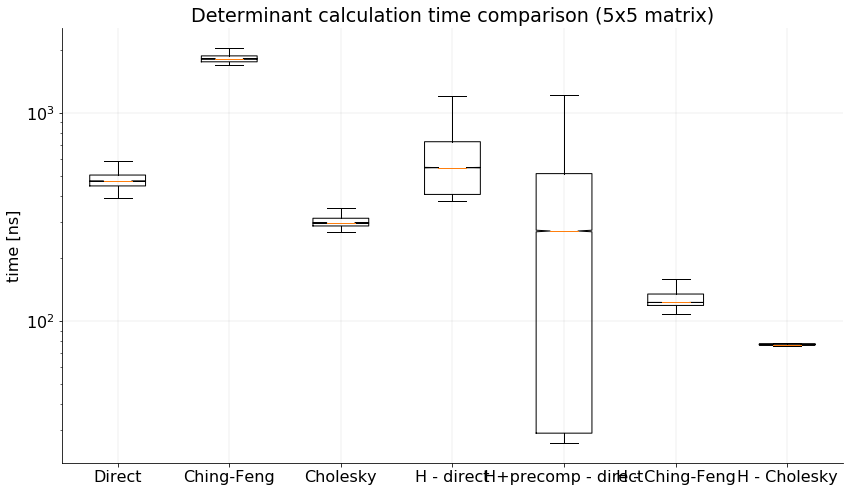

In [6]:
def boxplot(x, labels, ylabel, title, showfliers=True, yscale="log"):
    fig, ax = plt.subplots()

    plt.ylabel(ylabel)
    plt.title(title)
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.boxplot(x, labels=labels, notch=True, showfliers=showfliers)

file_names = ["m001", "m002", "m003", "m004", "m005", "m006", "m007", "m008", "m009", "m010", 
              "m020", "m030", "m040", "m050", "m060", "m070", "m080", "m090", "m100"]
labels = ["n=1",  "n=2",  "n=3",  "n=4",  "n=5",  "n=6",  "n=7",  "n=8",  "n=9", "n=10", 
          "n=20", "n=30", "n=40", "n=50", "n=60", "n=70", "n=80", "n=90", "n=100"]

org_arr = []
for file_name in ["org_det_ss-10e5/" + s + ".txt" for s in file_names]:
    org_arr.append(read_file(file_name))

cho_arr = []
for file_name in ["cho_det_ss-10e5/" + s + ".txt" for s in file_names]:
    cho_arr.append(read_file(file_name))

f_arr = []
for file_name in ["f_det_ss-10e5/" + s + ".txt" for s in file_names]:
    f_arr.append(read_file(file_name))

h_arr = []
h_arr.append(read_file("hardcoded_ss-10e5/noprecalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/precalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/chingfeng.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/cholesky.txt"))

ylabel = "time [ns]"

# title = "Determinant calculation of a nxn matrix through direct calculation"
# boxplot(org_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(org_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(org_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Cholesky decomposition"
# boxplot(cho_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(cho_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(cho_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Ching-Feng formula"
# boxplot(f_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(f_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(f_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

title = "Determinant calculation time comparison (5x5 matrix)"
names = ["Direct", "Ching-Feng", "Cholesky", "H - direct", "H+precomp - direct", "H - Ching-Feng"]
names.append("H - Cholesky")
arrs  = [org_arr[4]*10e5, f_arr[4]*10e5, cho_arr[4]*10e5, h_arr[0]*10e5, h_arr[1]*10e5, h_arr[2]*10e5]
arrs.append(h_arr[3]*10e5)
boxplot(arrs, names, ylabel, title, showfliers=False, yscale="log")

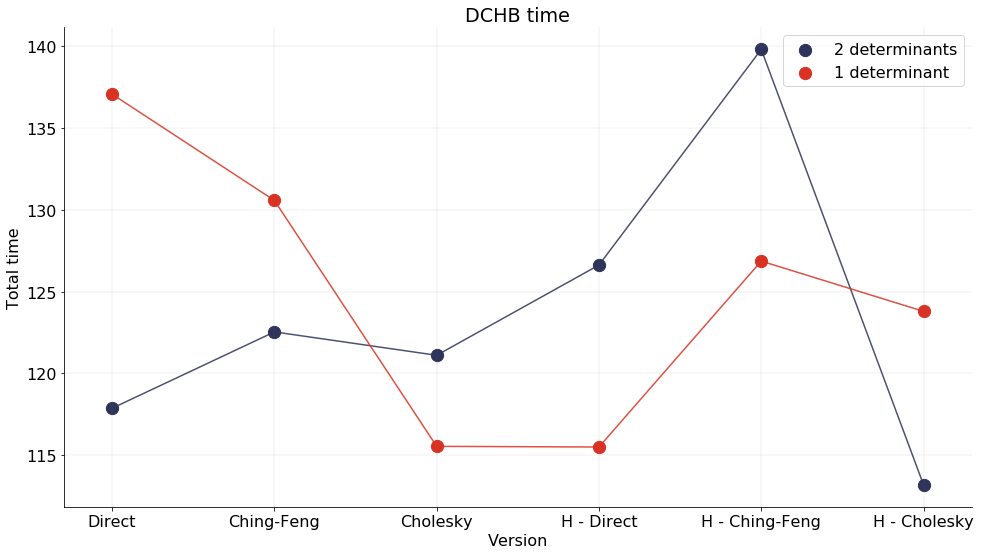

In [7]:
names      = ["Direct", "Ching-Feng", "Cholesky", "H - Direct", "H - Ching-Feng", "H - Cholesky"]
times_2det = np.array([117.87, 122.54, 121.11, 126.63, 139.82, 113.19])
times_1det = np.array([137.08, 130.58, 115.54, 115.50, 126.87, 123.80])

fig, ax = plt.subplots()

fig.set_size_inches(plot_size)
index = np.arange(len(names))

scatter2 = plt.scatter(index, times_2det, s=150, c=contrast_colors[0], label="2 determinants")
plot2    = plt.plot(   index, times_2det, c=contrast_colors[0], alpha=baralpha)
scatter1 = plt.scatter(index, times_1det, s=150, c=contrast_colors[4], label="1 determinant")
plot1    = plt.plot(   index, times_1det, c=contrast_colors[4], alpha=baralpha)

plt.xlabel("Version")
plt.ylabel("Total time")
plt.title("DCHB time")
plt.xticks(index, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

# Engine Times

Version:
* v1.0: Original JLab version
* v1.1: Refactored and micro-optimized
* v1.2: Sherman-Morrison formula implementated
* v1.3: Cholesky decomposition implemented
* v1.4.1: Multithreaded track finding
* v1.4.2: Multithreaded cluster finding
* v1.5: Current status

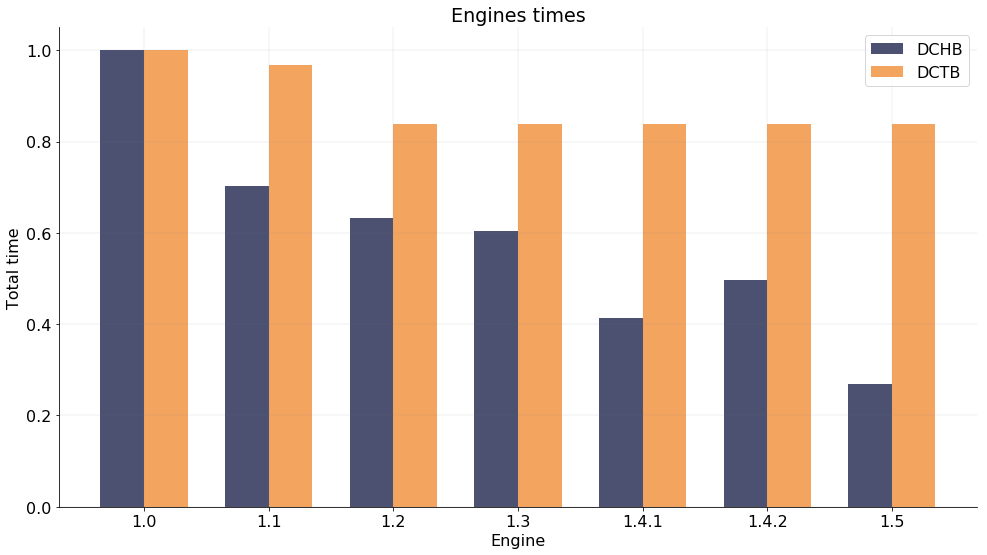

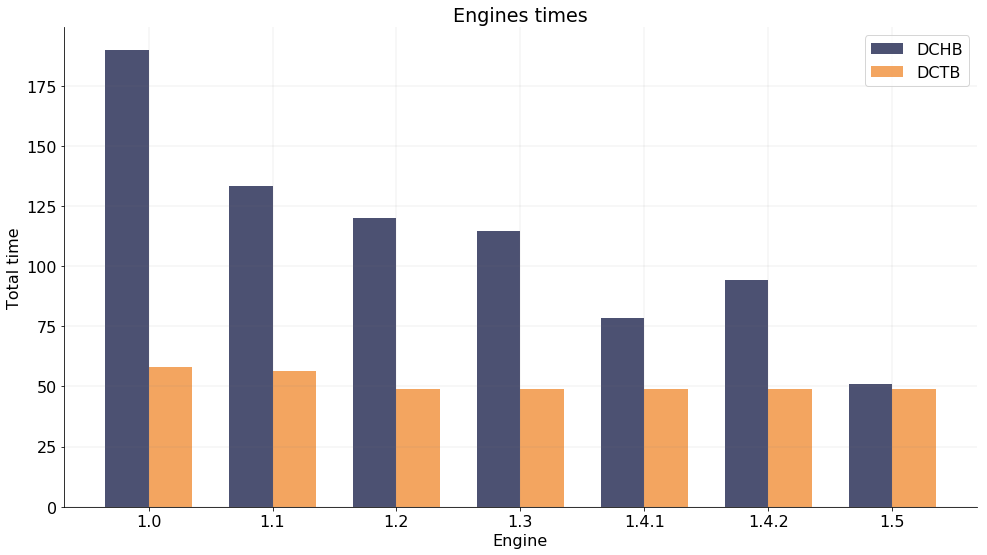

In [8]:
def hbtbplot(hb_t, tb_t, names, i_color=0):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(names))
    bar_width = 0.35

    if i_color >= 3:
        i_color = 0

    rectsHB = plt.bar(index, hb_t, bar_width, alpha=baralpha, color=contrast_colors[i_color], label="DCHB")
    rectsTB = plt.bar(index + bar_width, tb_t, bar_width, alpha=baralpha, color=contrast_colors[i_color+2], label="DCTB")

    plt.xlabel("Engine")
    plt.ylabel("Total time")
    plt.title("Engines times")
    plt.xticks(index + bar_width/2, names)
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    plt.show()

versions = ["1.0", "1.1", "1.2", "1.3", "1.4.1", "1.4.2", "1.5"]
hb_t     = np.array([189.75, 133.52, 120.02, 114.80, 78.66, 94.27, 51.18]) # UPDATE
tb_t     = np.array([ 58.18,  56.24,  48.78,  48.78, 48.78, 48.78, 48.78]) # UPDATE

# TODO: Start with this plot in my thesis when comparing versions
hbtbplot(hb_t/hb_t[0], tb_t/tb_t[0], versions, i_color=0)
hbtbplot(hb_t, tb_t, versions, i_color=0)

# Simulated magfield chi^2 probability

In [10]:
names = ["","","","", "5","","","","","10",
         "","","","","15","","","","","20",
         "","","","","25","","","","","30"]

real_B = np.array([0.            , 0.            , 7.797761881883, 6.866460486640, 6.318230946680, 5.864969306331, 
                   5.471155765794, 5.121151995119, 4.805862678366, 4.520623385313, 4.261617705559, 4.025684506669, 
                   3.810146329302, 3.612717949053, 3.431435318705, 3.264568701255, 3.110616176987, 2.968176390108, 
                   2.835854543298, 2.712095982822, 2.596684083594, 2.488994617229, 2.388329334254, 2.294051221871, 
                   2.205641393593, 2.122597991359, 2.044484853714, 1.970915466109, 1.901499989435, 1.835952437098])

sim_B  = []
sim_B.append(np.array([ # si = 100
        17.618463810852, 24.011273251720, 20.049986258619, 18.743785506392, 17.751799832566, 16.869113597689, 
        16.063713670983, 15.322623800466, 14.637569646099, 14.030928113723, 13.438917444078, 12.885821923003, 
        12.369249075294, 11.885731643272, 11.432193403747, 11.006027912082, 10.604905282326, 10.226855925175, 
         9.870057470850,  9.532872358867,  9.213822910608,  8.911577800229,  8.624927831167,  8.352774142545, 
         8.094114050982,  7.848036026744,  7.613699300148,  7.390342578544,  7.177266028319,  6.973817252857
]))
sim_B.append(np.array([ # si = 90
    
]))
sim_B.append(np.array([ # si = 50
        2.18503, 1.49815, 1.08910, 0.83378, 0.66395, 0.54524, 0.45893, 0.39417, 0.34428, 0.30503, 
        0.27357, 0.24796, 0.22683, 0.20919, 0.19431, 0.18164, 0.17076, 0.16134, 0.15314, 0.14595, 
        0.13962, 0.13400, 0.12901, 0.12454, 0.12053, 0.11692, 0.11365, 0.11068, 0.10798, 0.10552, 
        0.10326, 0.10119, 0.09929, 0.09753, 0.09591, 0.09441, 0.09302, 0.09172, 0.09052, 0.08940, 
        0.08835, 0.08737, 0.08645, 0.08558, 0.08477, 0.08401, 0.08329, 0.08261, 0.08198, 0.08137, 
        0.08080, 0.08026, 0.07975, 0.07926, 0.07880, 0.07836, 0.07794, 0.07754, 0.07716
]))
sim_B.append(np.array([ # si = 20
        2.14944, 1.46828, 1.06905, 0.81924, 0.65278, 0.53636, 0.45168, 0.38813, 0.33918, 0.30066, 
        0.26979, 0.24466, 0.22392, 0.20661, 0.19200, 0.17956, 0.16888, 0.15964, 0.15159, 0.14453, 
        0.13831, 0.13280, 0.12790, 0.12351, 0.11957, 0.11602, 0.11281, 0.10990, 0.10725, 0.10483, 
        0.10261, 0.10058, 0.09871, 0.09698, 0.09539, 0.09391, 0.09255, 0.09127, 0.09009, 0.08898, 
        0.08795, 0.08699, 0.08608, 0.08524, 0.08444, 0.08369, 0.08298, 0.08232, 0.08169, 0.08109, 
        0.08053, 0.08000, 0.07950, 0.07902, 0.07856, 0.07813, 0.07772, 0.07733, 0.07696
]))
sim_B.append(np.array([ # si = 10
        2.16307, 1.47745, 1.07512, 0.82368, 0.65620, 0.53907, 0.45389, 0.38995, 0.34071, 0.30196, 
        0.27091, 0.24563, 0.22477, 0.20736, 0.19266, 0.18015, 0.16941, 0.16011, 0.15202, 0.14492, 
        0.13867, 0.13313, 0.12819, 0.12378, 0.11982, 0.11626, 0.11303, 0.11010, 0.10743, 0.10500, 
        0.10277, 0.10073, 0.09885, 0.09712, 0.09552, 0.09403, 0.09266, 0.09138, 0.09019, 0.08908, 
        0.08804, 0.08707, 0.08616, 0.08531, 0.08451, 0.08376, 0.08305, 0.08238, 0.08175, 0.08115, 
        0.08059, 0.08005, 0.07954, 0.07906, 0.07861, 0.07817, 0.07776, 0.07737, 0.07699
]))

ValueError: x and y must be the same size

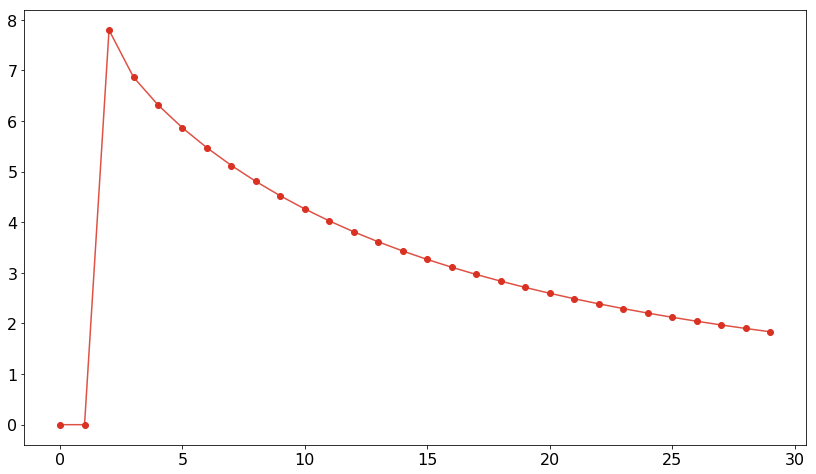

In [11]:
fig, ax = plt.subplots()
    
fig.set_size_inches(plot_size)
index = np.arange(len(names))

# REAL MAGNETIC FIELD PLOT
plt.scatter(index, real_B, c=contrast_colors[4], label="Real B")
plt.plot(   index, real_B, c=contrast_colors[4], alpha=baralpha)

# SIMULATED MAGNETIC FIELD PLOTS
# plt.scatter(index, sim_B[0], c=contrast_colors[0],  label="Simulated B - si=100")
# plt.plot(   index, sim_B[0], c=contrast_colors[0],  alpha=baralpha)

plt.scatter(index, sim_B[1], c=contrast_colors[1],  label="Simulated B - si=90")
plt.plot(   index, sim_B[1], c=contrast_colors[1],  alpha=baralpha)

# plt.scatter(index, sim_B[2], c=contrast_colors[2],  label="Simulated B - si=80")
# plt.plot(   index, sim_B[2], c=contrast_colors[2],  alpha=baralpha)

# plt.scatter(index, sim_B[3], c=contrast_colors[3], label="Simulated B - si=70")
# plt.plot(   index, sim_B[3], c=contrast_colors[3], alpha=baralpha)

# plt.scatter(index, sim_B[3], c=contrast_colors[3], label="Simulated B - si=60")
# plt.plot(   index, sim_B[3], c=contrast_colors[3], alpha=baralpha)

# plt.scatter(index, sim_B[3], c=contrast_colors[3], label="Simulated B - si=50")
# plt.plot(   index, sim_B[3], c=contrast_colors[3], alpha=baralpha)

# plt.scatter(index, sim_B[3], c=contrast_colors[3], label="Simulated B - si=25")
# plt.plot(   index, sim_B[3], c=contrast_colors[3], alpha=baralpha)

# plt.scatter(index, sim_B[3], c=contrast_colors[3], label="Simulated B - si=10")
# plt.plot(   index, sim_B[3], c=contrast_colors[3], alpha=baralpha)

# plt.scatter(index, sim_B[3], c=contrast_colors[3], label="Simulated B - si=5")
# plt.plot(   index, sim_B[3], c=contrast_colors[3], alpha=baralpha)

plt.yscale("log")
plt.xlabel("Kalman Filter Iteration")
plt.ylabel("Chi^2 Error")
plt.title("Chi^2 Comparison")
plt.xticks(index, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color=gray, linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

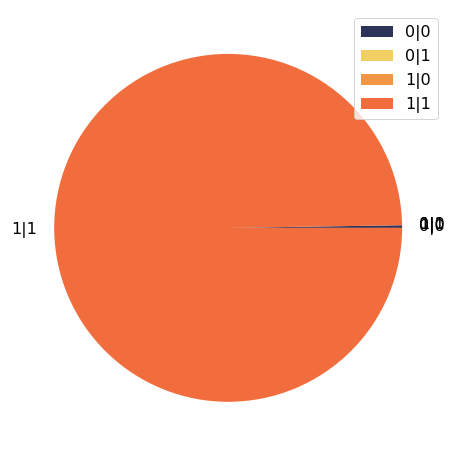

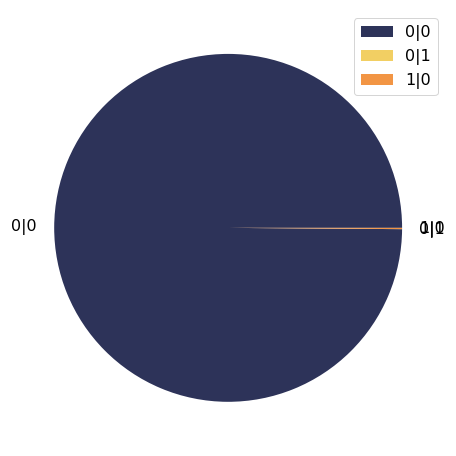

In [12]:
x = [51479, 2, 59, 21607688]
l = ["0|0", "0|1", "1|0", "1|1"]
c = [contrast_colors[0], contrast_colors[1], contrast_colors[2], contrast_colors[3]]

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
plt.pie(x, labels=l, colors=c)
plt.legend()
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
plt.pie(x[0:3], labels=l[0:3], colors=c[0:3])
plt.legend()
plt.show()

# Time per engine (20180907):

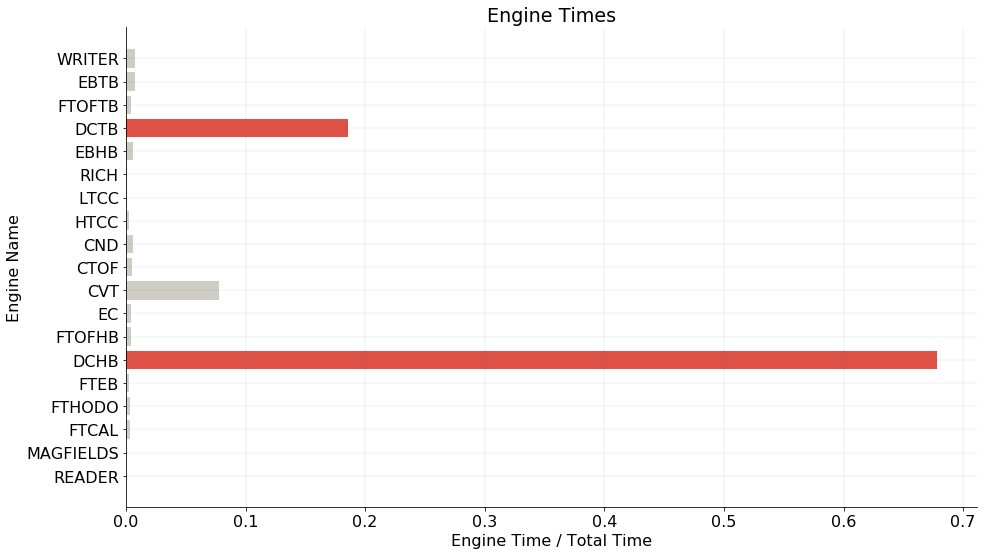

In [13]:
def enginesplot(x, y, colors, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    y_pos = np.arange(len(x))
    plt.barh(y_pos, y, color=colors, align='center', alpha=baralpha)
    plt.yticks(y_pos, x)
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    plt.title(title)

    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.show()
# 20180907
names = [
    "READER"    , "MAGFIELDS" , "FTCAL"     , "FTHODO"    ,
    "FTEB"      , "DCHB"      , "FTOFHB"    , "EC"        ,
    "CVT"       , "CTOF"      , "CND"       , "HTCC"      ,
    "LTCC"      , "RICH"      , "EBHB"      , "DCTB"      ,
    "FTOFTB"    , "EBTB"      , "WRITER"
]
times = np.array([
      0.11,   0.01,   0.94,   0.87,
      0.70, 173.50,   1.14,   1.00,
     19.87,   1.23,   1.56,   0.57,
      0.29,   0.14,   1.60,  47.55,   
      1.17,   1.88,   1.85
])/255.98
colors = [
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#d93223", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#d93223",
    "#c6c3ba", "#c6c3ba", "#c6c3ba"
]

enginesplot(names, times, colors, "Engine Name", "Engine Time / Total Time", "Engine Times")

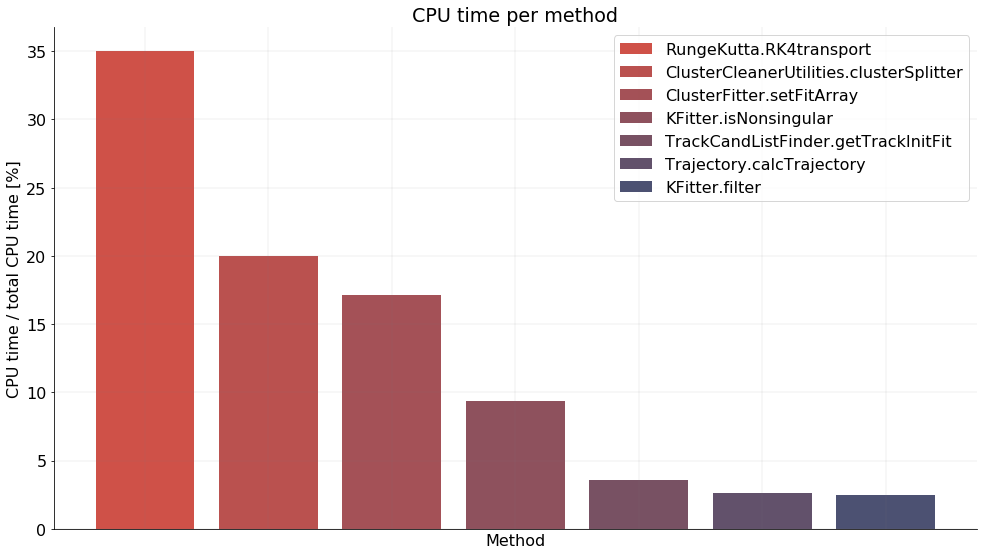

In [14]:
methods = ["RungeKutta.RK4transport",
           "ClusterCleanerUtilities.clusterSplitter",
           "ClusterFitter.setFitArray",
           "KFitter.isNonsingular",
           "TrackCandListFinder.getTrackInitFit",
           "Trajectory.calcTrajectory",
           "KFitter.filter"
          ]
y_pos = np.arange(len(methods))
total_time = np.array([35.0, 20.0, 17.1, 9.4, 3.6, 2.6, 2.5])

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
    
# plt.bar(y_pos, total_time, color=hue_grad[0:len(methods)], align='center', alpha=baralpha)
plt.bar( 0, total_time[ 0], color=hue_grad[18], align='center', alpha=baralpha, label=methods[ 0])
plt.bar( 1, total_time[ 1], color=hue_grad[15], align='center', alpha=baralpha, label=methods[ 1])
plt.bar( 2, total_time[ 2], color=hue_grad[12], align='center', alpha=baralpha, label=methods[ 2])
plt.bar( 3, total_time[ 3], color=hue_grad[ 9], align='center', alpha=baralpha, label=methods[ 3])
plt.bar( 4, total_time[ 4], color=hue_grad[ 6], align='center', alpha=baralpha, label=methods[ 4])
plt.bar( 5, total_time[ 5], color=hue_grad[ 3], align='center', alpha=baralpha, label=methods[ 5])
plt.bar( 6, total_time[ 6], color=hue_grad[ 0], align='center', alpha=baralpha, label=methods[ 6])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.xlabel("Method")
plt.ylabel("CPU time / total CPU time [%]")
plt.title("CPU time per method")

plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend()

plt.show()

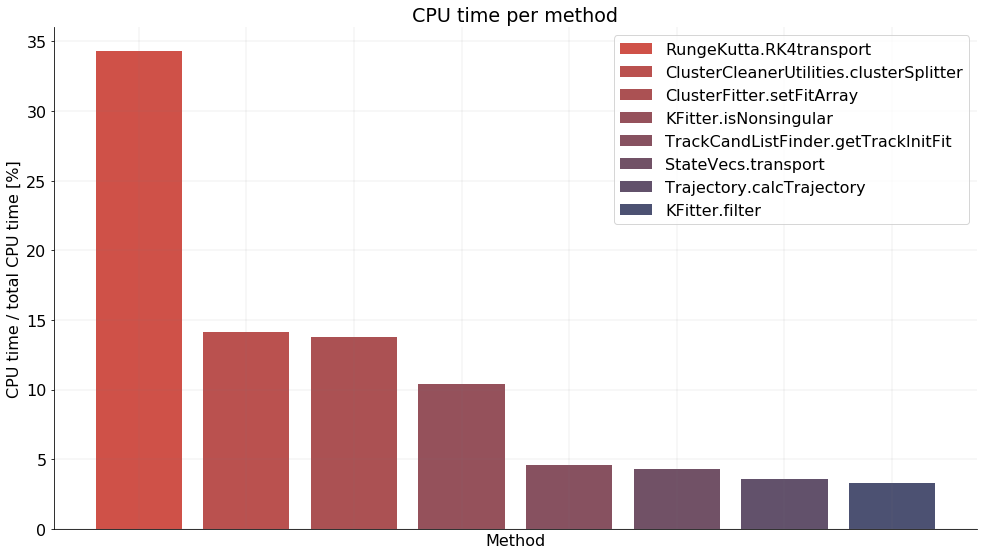

In [15]:
methods = ["RungeKutta.RK4transport",
           "ClusterCleanerUtilities.clusterSplitter",
           "ClusterFitter.setFitArray",
           "KFitter.isNonsingular",
           "TrackCandListFinder.getTrackInitFit",
           "StateVecs.transport",
           "Trajectory.calcTrajectory",
           "KFitter.filter"
          ]
y_pos = np.arange(len(methods))
total_time = np.array([35.0, 20.0, 17.1, 9.4, 3.6, 2.6, 2.5])
total_time = np.array([34.3, 14.1, 13.8, 10.4, 4.6, 4.3, 3.6, 3.3])

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
    
# plt.bar(y_pos, total_time, color=hue_grad[0:len(methods)], align='center', alpha=baralpha)
plt.bar( 0, total_time[ 0], color=hue_grad[18], align='center', alpha=baralpha, label=methods[ 0])
plt.bar( 1, total_time[ 1], color=hue_grad[15], align='center', alpha=baralpha, label=methods[ 1])
plt.bar( 2, total_time[ 2], color=hue_grad[13], align='center', alpha=baralpha, label=methods[ 2])
plt.bar( 3, total_time[ 3], color=hue_grad[10], align='center', alpha=baralpha, label=methods[ 3])
plt.bar( 4, total_time[ 4], color=hue_grad[ 8], align='center', alpha=baralpha, label=methods[ 4])
plt.bar( 5, total_time[ 5], color=hue_grad[ 5], align='center', alpha=baralpha, label=methods[ 5])
plt.bar( 6, total_time[ 6], color=hue_grad[ 3], align='center', alpha=baralpha, label=methods[ 6])
plt.bar( 7, total_time[ 7], color=hue_grad[ 0], align='center', alpha=baralpha, label=methods[ 7])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.xlabel("Method")
plt.ylabel("CPU time / total CPU time [%]")
plt.title("CPU time per method")

plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend()

plt.show()